[(1, 4.3), (2, 6.37), (3, 8.31), (4, 10.36), (5, 12.32), (6, 14.24), (7, 16.23), (8, 18.12), (9, 20.18), (10, 22.39)]
last val: 0.009734236319259182
2.2633814669738257 0.38651336474290504


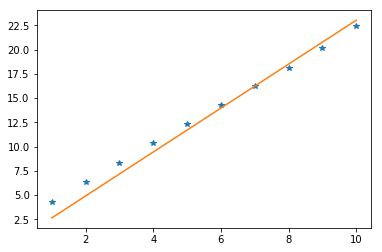

In [4]:
import random
import matplotlib.pyplot as plt
# 产生训练数据
# y = 2x + 2
x_train = list(range(1, 11))
y_train = [2*x+2+round(random.uniform(0.1, 0.4), 2) for x in x_train]

# 假设函数
def h(x, th0, th1):
    return th0 + th1*x

def train_data(xdata, ydata):
    alpha = 0.002
    count = 0
    # 记录上次误差值
    lastval = 0
    # 阀值
    threshold = 0.01
    # 两个参数
    theta0 = 0
    theta1 = 0
    # 训练数据处理
    data = list(zip(xdata, ydata))
    print(data)
    m = len(xdata)
    while True:
        count += 1
        # 记录梯度下降的值
        tmp = [0,0]
        # 梯度下降
        for x, y in data:
            tmp[0] += h(x, theta0, theta1) - y
            tmp[1] += (h(x, theta0, theta1) - y) * x
        # 计算theta0, theta1
        theta0 = theta0 - alpha*tmp[0]/m
        theta1 = theta1 - alpha*tmp[1]/m
        # 计算点到直线的值
        val = sum([pow(y-h(x, theta0, theta1), 2) for x, y in data])
        # 当前次差值与上一次差值计算，如果小于设置阀值，结束
        if abs(val-lastval) < threshold:
            print('last val:', abs(val-lastval))
            # 绘制最后一条直线
            plt.plot(xdata, [h(x, theta0, theta1) for x in xdata])
            break
        # 记录上次值
        lastval = val
        # 绘制直线
#         plt.plot(xdata, [h(x, theta0, theta1) for x in xdata])
    print(theta1, theta0)
    return theta1, theta0
# 绘制点
plt.plot(x_train, y_train, '*')
# 开始训练
train_data(x_train, y_train)
plt.show()